<a href="https://colab.research.google.com/github/arezyapova/projects/blob/main/miniproject_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [ ]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [ ]:

# Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. 
# Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
# Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

# А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [ ]:
ads_data         = pd.read_csv('/home/jupyter-a.rezjapova-13/lesson_6/ads_data.csv', 
                               parse_dates=['date'])
ads_clients_data = pd.read_csv('/home/jupyter-a.rezjapova-13/lesson_6/ads_clients_data.csv', 
                               parse_dates=['date', 'create_date'])

In [ ]:
# Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и 
# среднее количество кликов на объявления за весь период (округлите до целых).

In [ ]:
by_event = ads_data.groupby('event', as_index = False)\
        .agg({'ad_id':'count'})\
        .rename(columns = {'ad_id':'total'})

In [ ]:
by_event['average'] = by_event['total'] /ads_data.ad_id.nunique()

In [ ]:
by_event['average'] = by_event['average'].round()

In [ ]:
ads_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [ ]:
# Нарисуйте график распределения показов на объявление за весь период.

In [ ]:
ads_event = ads_data.groupby(['ad_id','event'], as_index = False)\
        .agg({'platform':'count'})\
        .rename(columns = {'platform':'ads_number'})

In [ ]:
ads_event_pivot = ads_event.pivot(index = 'ad_id', columns = 'event', values = 'ads_number')

In [ ]:
ads_event_pivot = ads_event_pivot.fillna(0)

In [ ]:
ads_event_pivot['log_view'] = np.log(ads_event_pivot.view+1)

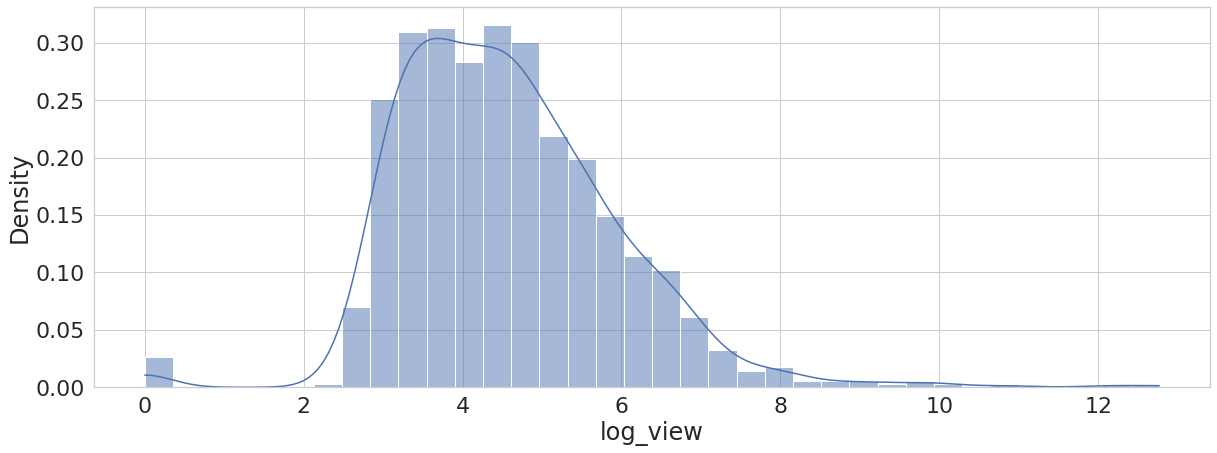

In [ ]:
ax_log_view = sns.histplot(x = 'log_view', data = ads_event_pivot, kde = True, stat = 'density')

In [ ]:
# Давайте посчитаем скользящее среднее показов с окном 2. 
# Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

In [ ]:
ads_date_id = ads_data.query('event=="view"')\
        .groupby(['date', 'ad_id'], as_index = False)\
        .agg({'ad_cost_type':'count'})\
        .rename(columns={'ad_cost_type':'ad_count'})

In [ ]:
mean_views_day = ads_date_id.groupby('date', as_index=False)\
        .agg({'ad_count':'mean'})\
        .rename(columns={'ad_count':'mean_views'})

In [ ]:
mean_views_day['rolling_mean'] = mean_views_day.mean_views.rolling(2).mean()

In [ ]:
mean_views_day

,date,mean_views,rolling_mean
0,2019-04-01,154.482270,NaN
1,2019-04-02,137.786982,146.134626
2,2019-04-03,163.952778,150.869880
3,2019-04-04,675.901720,419.927249
4,2019-04-05,919.109677,797.505699
5,2019-04-06,277.122727,598.116202


In [ ]:
#Скользящее среднее часто используется для поиска аномалий в данных. 
# Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов.

In [ ]:
fig = px.line(mean_views_day, x='date', y=['mean_views', 'rolling_mean'])
fig.show()

In [ ]:
# В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 
# Дни, в которых скользящее среднее равно NaN, не учитываем.

In [ ]:
mean_views_day['abs_diff'] = np.absolute(mean_views_day.rolling_mean - mean_views_day.mean_views)

In [ ]:
mean_views_day['diff'] = mean_views_day.rolling_mean - mean_views_day.mean_views

In [ ]:
mean_views_day

,date,mean_views,rolling_mean,abs_diff,diff
0,2019-04-01,154.482270,NaN,NaN,NaN
1,2019-04-02,137.786982,146.134626,8.347644,8.347644
2,2019-04-03,163.952778,150.869880,13.082898,-13.082898
3,2019-04-04,675.901720,419.927249,255.974471,-255.974471
4,2019-04-05,919.109677,797.505699,121.603979,-121.603979
5,2019-04-06,277.122727,598.116202,320.993475,320.993475


In [ ]:
#  *Напишите функцию, которая найдет проблемное объявление
# (с наибольшим/наименьшим количеством показов) в день, в который была замечена самая большая по модулю аномалия. 

In [ ]:
ads_date_id[ads_date_id.date=='2019-04-06'].sort_values('ad_count', ascending = False)

,date,ad_id,ad_count
1902,2019-04-06,112583,48991
1776,2019-04-06,28142,3280
1806,2019-04-06,38892,1337
1801,2019-04-06,37720,835
1737,2019-04-06,18425,426
...,...,...,...
1739,2019-04-06,18681,1
1773,2019-04-06,27581,1
1795,2019-04-06,35615,1
1875,2019-04-06,106809,1


In [ ]:
# Функция для поиска аномальных показов


In [ ]:
# Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента 
# и первым запуском рекламного объявления этим клиентом.

In [ ]:
ads_clients_data.client_union_id.nunique()

122078

In [ ]:
ads_all = ads_data.merge(ads_clients_data, on = ['client_union_id'])

In [ ]:
ads_all['create_ad_diff'] = ads_all['date_x'] - ads_all['create_date']

In [ ]:
ads_all['create_ad_diff'].describe()

count                        1000000
mean     105 days 02:40:39.302399998
std       52 days 03:18:17.886581677
min                 26 days 00:00:00
25%                 66 days 00:00:00
50%                 67 days 00:00:00
75%                168 days 00:00:00
max                252 days 00:00:00
Name: create_ad_diff, dtype: object

In [ ]:
ads_all_by_client = ads_all.groupby('client_union_id', as_index=False).create_ad_diff.mean(numeric_only=False)

In [ ]:
ads_all_by_client['create_ad_diff'] = pd.to_timedelta(ads_all_by_client.create_ad_diff).astype('timedelta64[D]')

In [ ]:
ads_all_by_client['create_ad_diff'].mean()

124.46062052505967

In [ ]:
# Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. 
# Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))

In [ ]:
year = pd.Timedelta(365, unit="D")

In [ ]:
ads_all_right = ads_data.merge(ads_clients_data, how = 'right', on = ['client_union_id'])

In [ ]:
ads_all_right.isnull().sum()

date_x                   121240
time                     121240
event                    121240
platform                 121240
ad_id                    121240
client_union_id               0
campaign_union_id        121240
ad_cost_type             121240
ad_cost                  121240
has_video                121240
target_audience_count    121240
date_y                        0
community_id                  0
create_date                   0
dtype: int64

In [ ]:
ads_all_right['create_date']

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:08:51,view,android,3.0,1,1.0,CPC,46.7,0.0,45035.0,2020-05-07,-130371893,2018-12-24
1,2019-04-01,2019-04-01 00:09:36,view,ios,3.0,1,1.0,CPC,46.7,0.0,45035.0,2020-05-07,-130371893,2018-12-24
2,2019-04-01,2019-04-01 00:29:30,view,ios,3.0,1,1.0,CPC,46.7,0.0,45035.0,2020-05-07,-130371893,2018-12-24
3,2019-04-01,2019-04-01 00:29:58,view,android,3.0,1,1.0,CPC,46.7,0.0,45035.0,2020-05-07,-130371893,2018-12-24
4,2019-04-01,2019-04-01 00:51:54,view,android,3.0,1,1.0,CPC,46.7,0.0,45035.0,2020-05-07,-130371893,2018-12-24
